 1. Import Libraries

In [2]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


2. Load and Filter Legitimate Data

In [3]:
df = pd.read_csv('../fake_job_postings.csv')

# Fill missing descriptions
df['description'] = df['description'].fillna("")

# Keep only real jobs for training
df_real = df[df['fraudulent'] == 0]


3. TF-IDF Vectorization

In [4]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_real = tfidf.fit_transform(df_real['description'])


 4. Train One-Class SVM

In [5]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # nu ~ expected outlier fraction
ocsvm.fit(X_real)


OneClassSVM(nu=0.05)

 5. Predict on All Data

In [6]:
X_all = tfidf.transform(df['description'])
preds = ocsvm.predict(X_all)

# Convert: 1 → Real, -1 → Outlier (fake)
df['ocsvm_pred'] = [0 if p == 1 else 1 for p in preds]


6. Evaluate

In [7]:
cm = confusion_matrix(df['fraudulent'], df['ocsvm_pred'])
print("Confusion Matrix:\n", cm)
print(classification_report(df['fraudulent'], df['ocsvm_pred']))


Confusion Matrix:
 [[16067   947]
 [  755   111]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17014
           1       0.10      0.13      0.12       866

    accuracy                           0.90     17880
   macro avg       0.53      0.54      0.53     17880
weighted avg       0.91      0.90      0.91     17880



In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(df['fraudulent'], df['ocsvm_pred']))

Accuracy: 0.9048098434004475


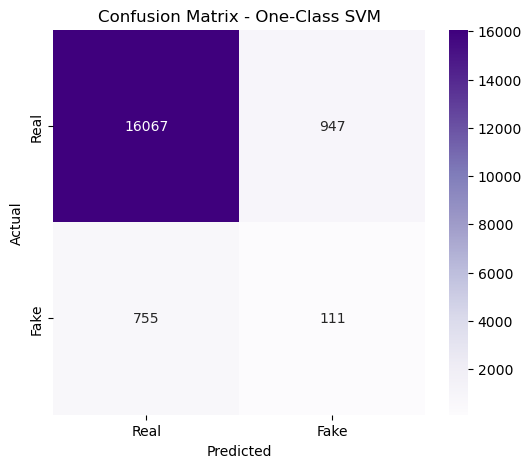

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - One-Class SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
import joblib

# Save the One-Class SVM model
joblib.dump(ocsvm, '../models/ocsvm_model.pkl')

# Save the TF-IDF vectorizer used for training
joblib.dump(tfidf, '../models/ocsvm_vectorizer.pkl')


['../models/ocsvm_vectorizer.pkl']